In [57]:
#!pip install oracledb

In [99]:
import oracledb
import matplotlib.pyplot as plt
import numpy as np

In [100]:
dsn = oracledb.makedsn("localhost", 1522, service_name="stu")
connection = oracledb.connect(user="ora_dty200", password="a65544413", dsn=dsn)
cursor = connection.cursor()

## Overall trend

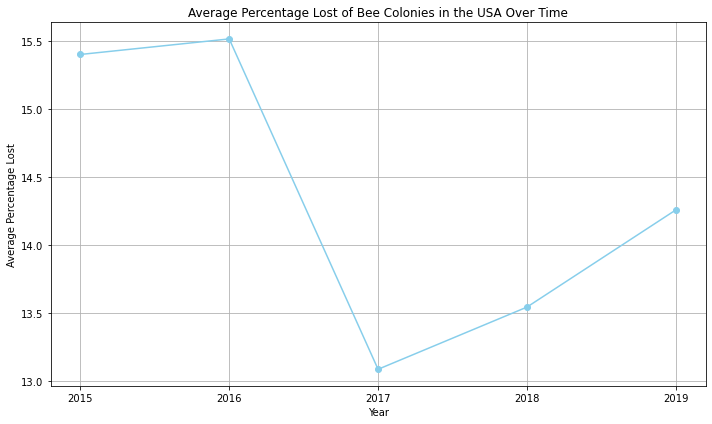

In [101]:
# Query to retrieve percentage lost data for each year for the whole USA
query = """
    SELECT Year, AVG(PercentLost) AS AveragePercentLost
    FROM Bee
    GROUP BY Year
    ORDER BY Year DESC
"""

# Execute the query
cursor.execute(query)

# Fetch all rows
rows = cursor.fetchall()

# Extract data into separate lists for plotting
years = []
percent_lost = []

for row in rows:
    years.append(row[0])
    percent_lost.append(row[1])

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(years, percent_lost, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Percentage Lost')
plt.title('Average Percentage Lost of Bee Colonies in the USA Over Time')
# Set integer ticks for the x-axis
plt.xticks(np.arange(min(years), max(years) + 1, 1));
plt.grid(True)
plt.tight_layout()
plt.show()

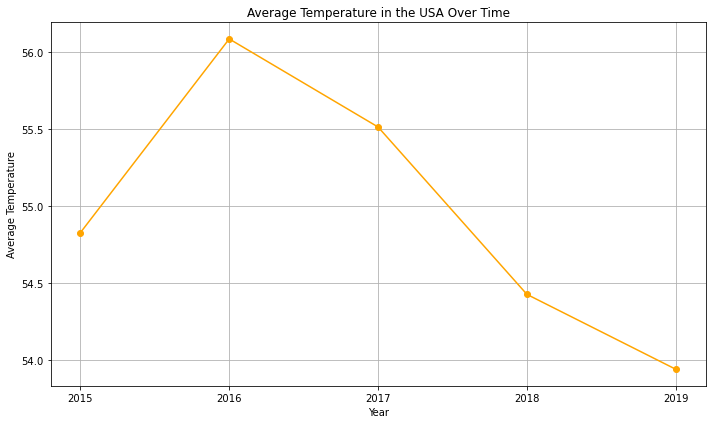

In [102]:
# Query to retrieve average temperature data for each year for the whole USA
query_temperature = """
    SELECT Year, AVG(AverageTemperature) AS AverageTemperature
    FROM MonitorStation
    GROUP BY Year
    ORDER BY Year DESC
"""

# Execute the temperature query
cursor.execute(query_temperature)

# Fetch all temperature rows
temperature_rows = cursor.fetchall()

# Extract data into separate lists for plotting
years_temperature = []
average_temperature = []
for row in temperature_rows:
    years_temperature.append(row[0])
    average_temperature.append(row[1])

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(years_temperature, average_temperature, marker='o', color='orange', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Average Temperature in the USA Over Time')
# Set integer ticks for the x-axis
plt.xticks(np.arange(min(years), max(years) + 1, 1));
plt.grid(True)
plt.tight_layout()
plt.show()

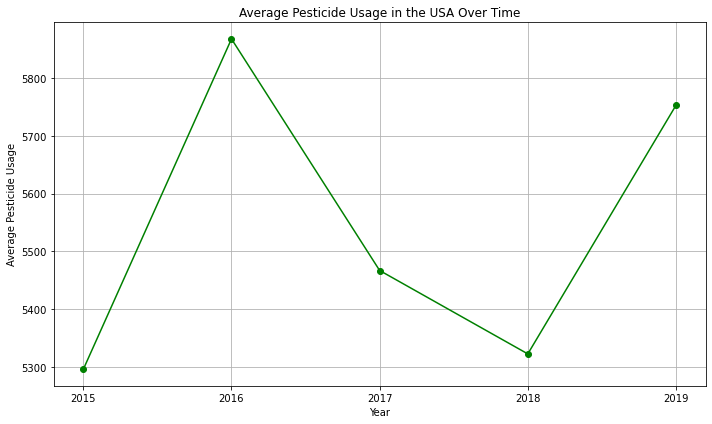

In [104]:
# Query to retrieve average pesticide usage data for each year for the whole USA
query = """
    SELECT Year, AVG((LowEstimate + HighEstimate) / 2) AS AveragePesticideUsage
    FROM Pesticide
    GROUP BY Year
    ORDER BY Year
"""

# Execute the query
cursor.execute(query)

# Fetch all rows
rows = cursor.fetchall()

# Extract data into separate lists for plotting
years = []
average_pesticide_usage = []

for row in rows:
    years.append(row[0])
    average_pesticide_usage.append(row[1])

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(years, average_pesticide_usage, marker='o', color='green', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Pesticide Usage')
plt.title('Average Pesticide Usage in the USA Over Time')
# Set integer ticks for the x-axis
plt.xticks(np.arange(min(years), max(years) + 1, 1));
plt.grid(True)
plt.tight_layout()
plt.show()

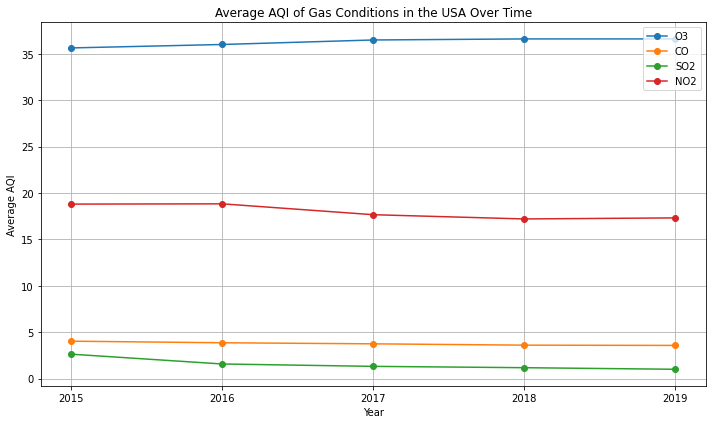

In [105]:
# Query to retrieve average AQI data of gas conditions for each gas for each year for the whole USA
# The higher the AQI value, the greater the level of air pollution and the greater the health concern.

query = """
    SELECT Year, Name, AVG(AverageAQI) AS AverageAQI
    FROM GasConditions
    GROUP BY Year, Name
    ORDER BY Year, Name
"""

# Execute the query
cursor.execute(query)

# Fetch all rows
rows = cursor.fetchall()

# Extract data into separate lists for plotting
years = []
gases = []
average_aqi_values = []

for row in rows:
    years.append(row[0])
    gases.append(row[1])
    average_aqi_values.append(row[2])

# Get unique gases
unique_gases = list(set(gases))

# Plot data using a line chart
plt.figure(figsize=(10, 6))

for gas in unique_gases:
    gas_years = [years[i] for i in range(len(years)) if gases[i] == gas]
    gas_values = [average_aqi_values[i] for i in range(len(average_aqi_values)) if gases[i] == gas]
    plt.plot(gas_years, gas_values, marker='o', label=gas)

plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.title('Average AQI of Gas Conditions in the USA Over Time')
plt.legend()
# Set integer ticks for the x-axis
plt.xticks(np.arange(min(years), max(years) + 1, 1));
plt.grid(True)
plt.tight_layout()
plt.show()

## Top 10 states with the most percentage lost of Bees

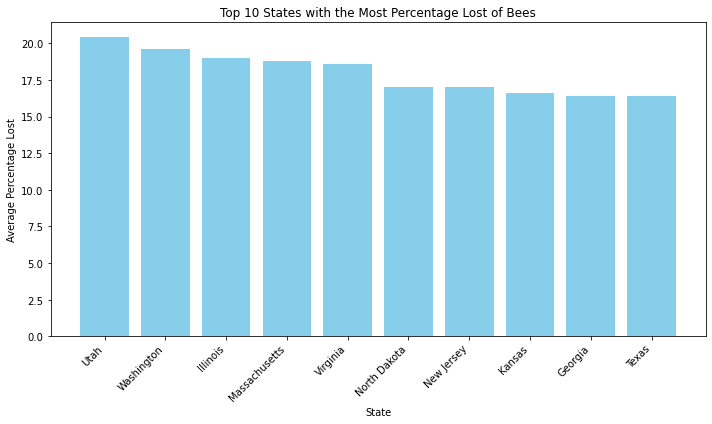

In [106]:
# Query to retrieve top 10 states with the most percentage lost of bees
query = """
    SELECT State, AVG(PercentLost) AS AveragePercentLost
    FROM Bee
    GROUP BY State
    ORDER BY AveragePercentLost DESC
    FETCH FIRST 10 ROWS ONLY
"""

# Execute the query
cursor.execute(query)

# Fetch all rows
rows = cursor.fetchall()

# Extract data into separate lists for plotting
states = []
percent_lost = []

for row in rows:
    states.append(row[0])
    percent_lost.append(row[1])

# Plot data using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(states, percent_lost, color='skyblue')
plt.xlabel('State')
plt.ylabel('Average Percentage Lost')
plt.title('Top 10 States with the Most Percentage Lost of Bees')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [108]:
# Query to retrieve the top 10 states with the most percentage lost of bees
query = """
    SELECT State, AVG(PercentLost) AS AveragePercentLost
    FROM Bee
    GROUP BY State
    ORDER BY AveragePercentLost DESC
    FETCH FIRST 10 ROWS ONLY
"""

# Execute the query
cursor.execute(query)

# Fetch all rows
rows = cursor.fetchall()

# Extract state names from the fetched rows
top_10_states = [row[0] for row in rows]

# Print the names of the top 10 states
print("Top 10 States with the Most Percentage Lost:")
for state in top_10_states:
    print(state)

Top 10 States with the Most Percentage Lost:
Utah
Washington
Illinois
Massachusetts
Virginia
North Dakota
New Jersey
Kansas
Georgia
Texas


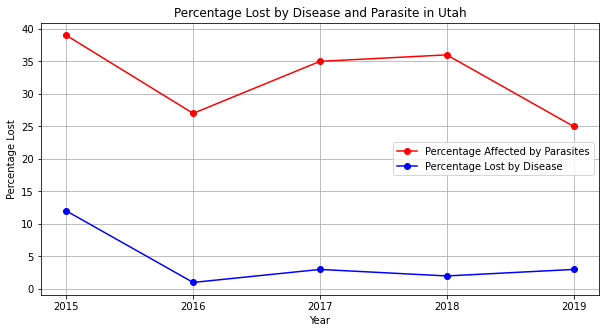

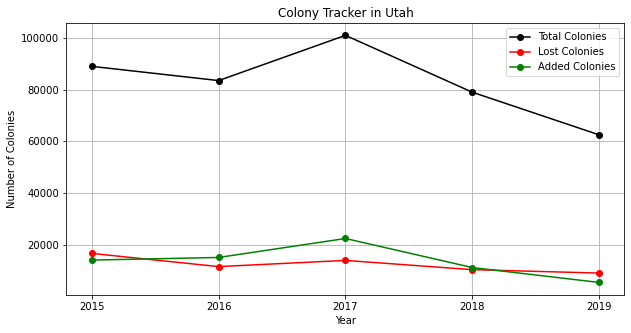

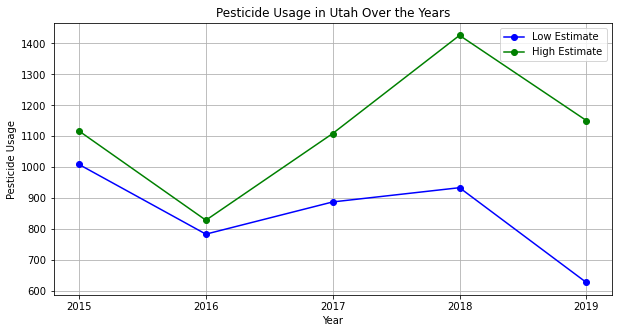

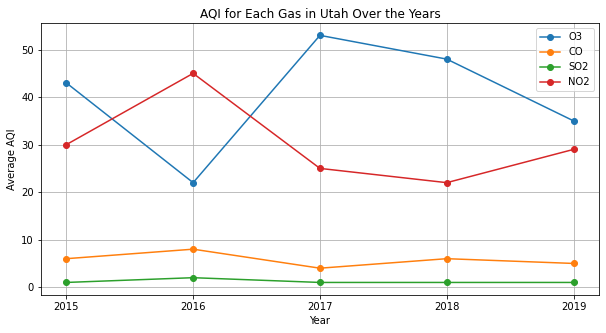

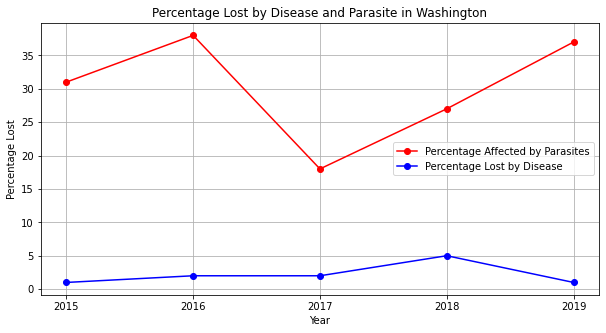

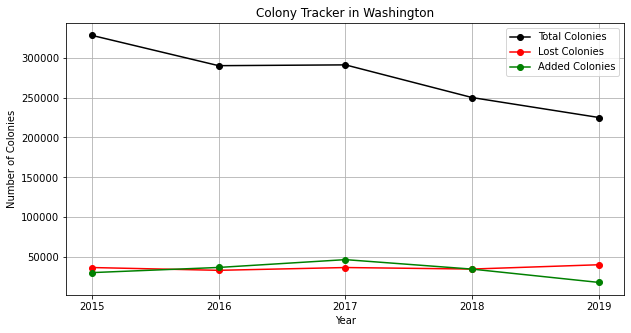

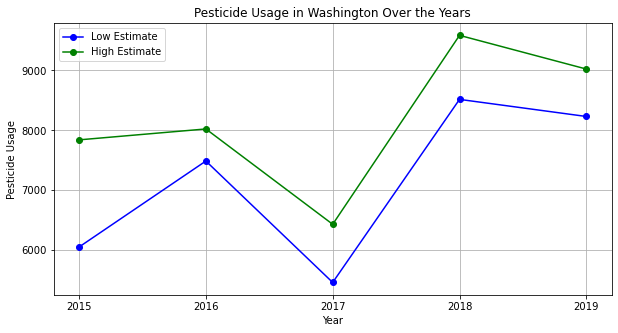

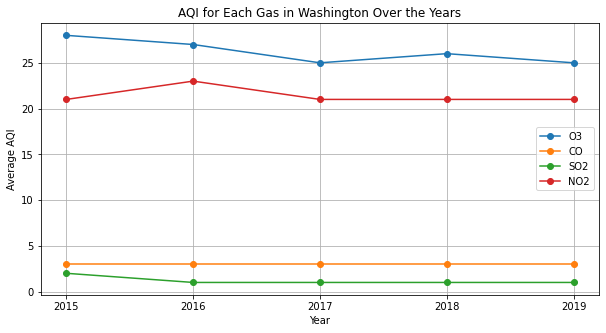

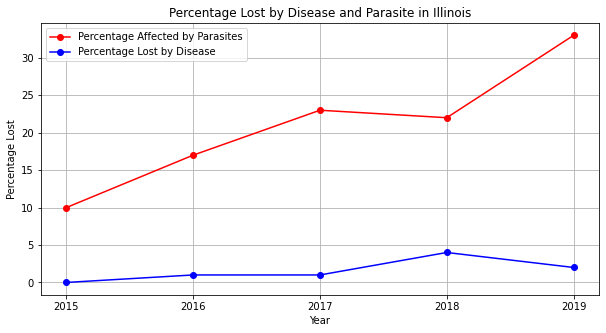

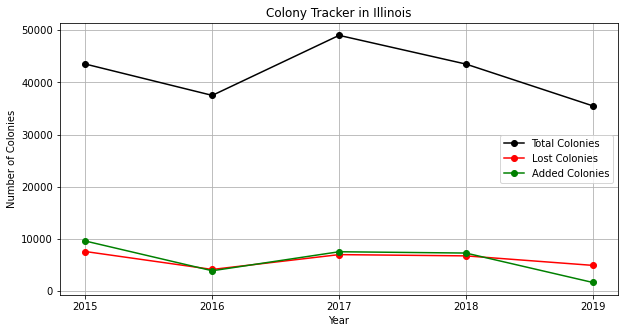

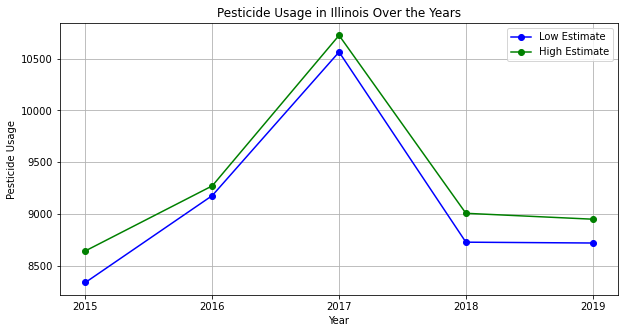

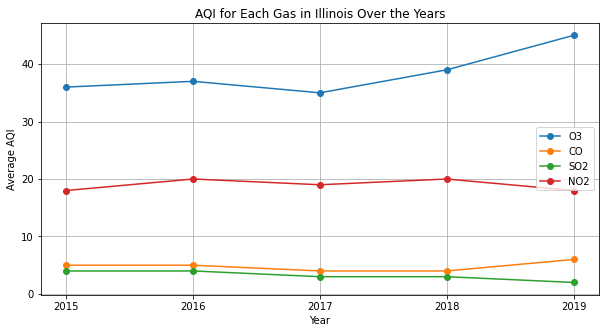

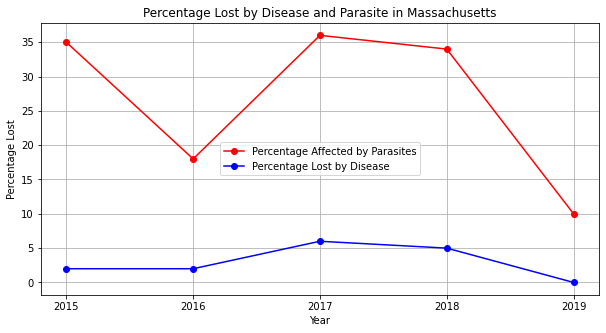

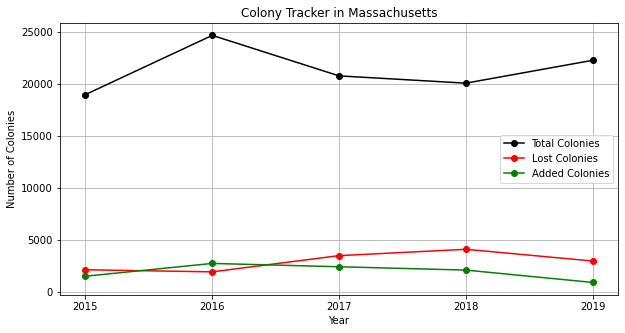

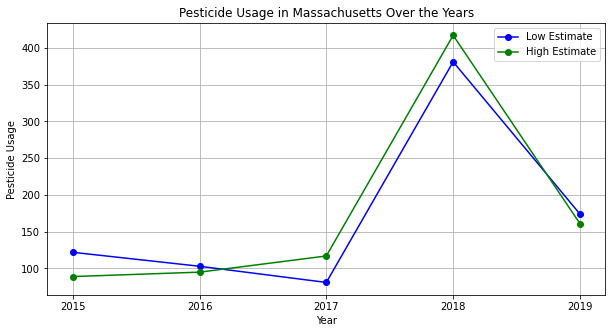

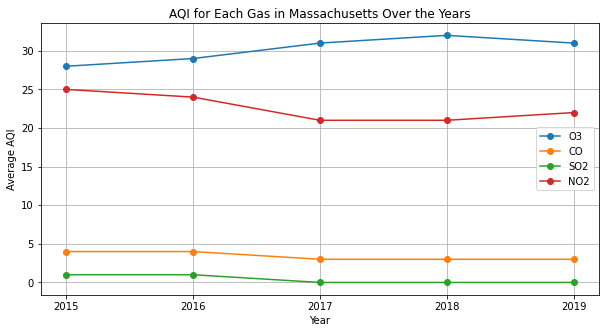

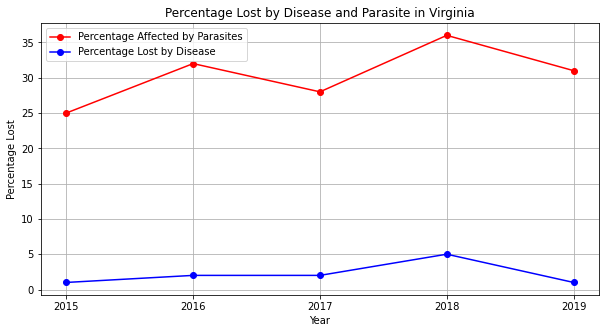

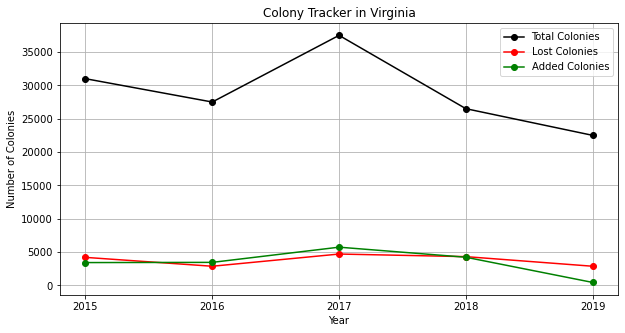

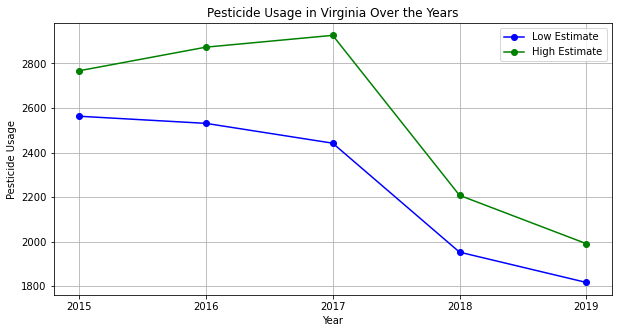

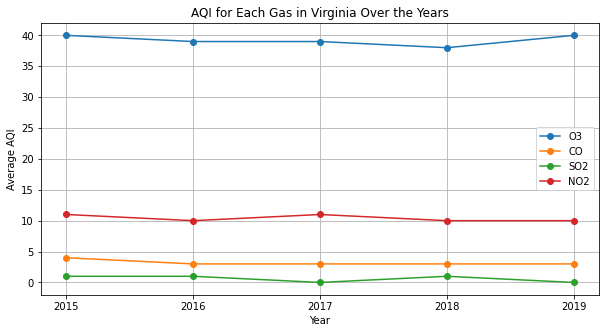

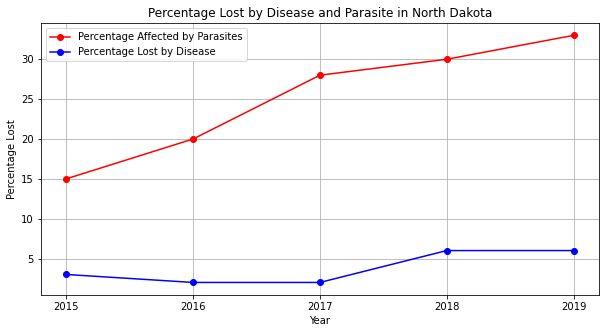

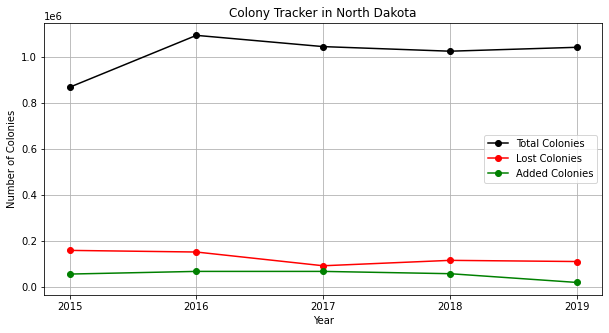

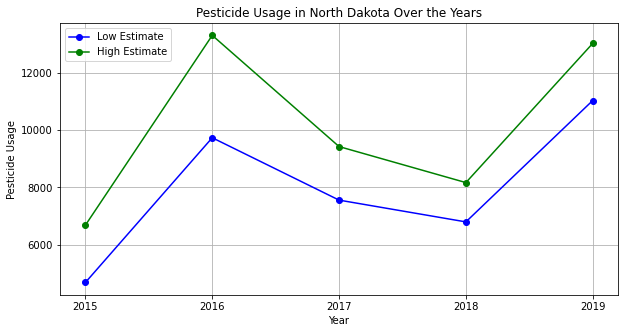

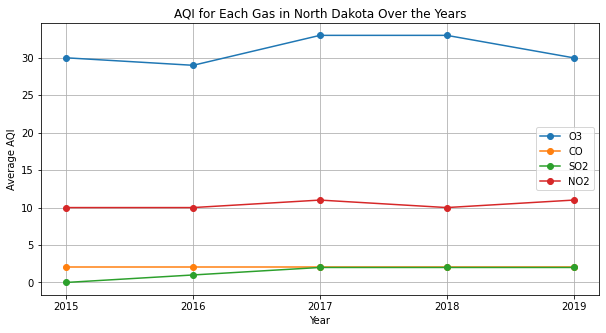

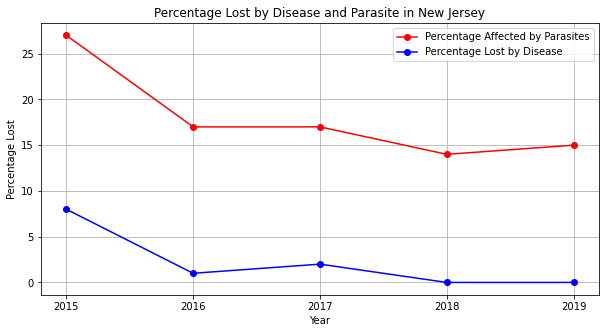

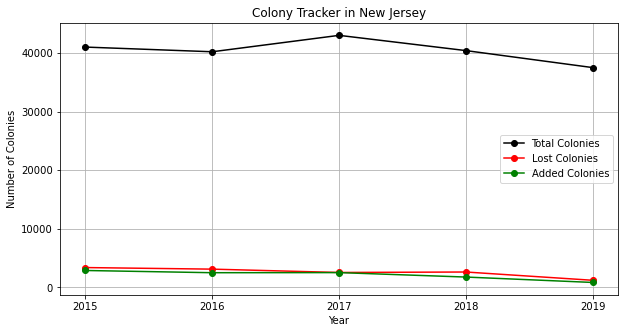

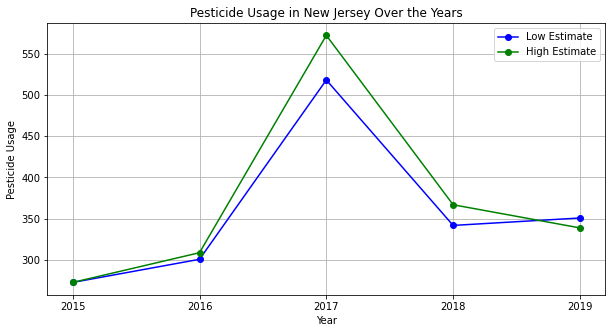

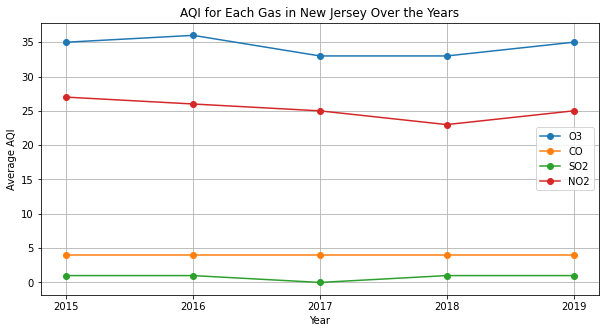

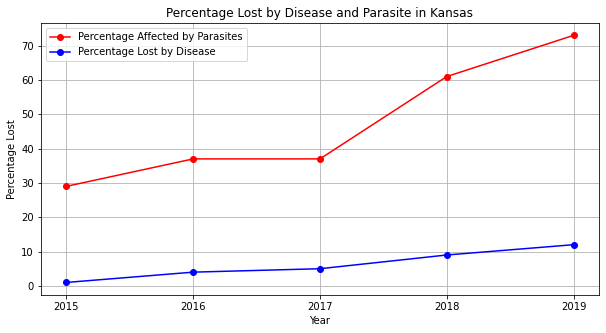

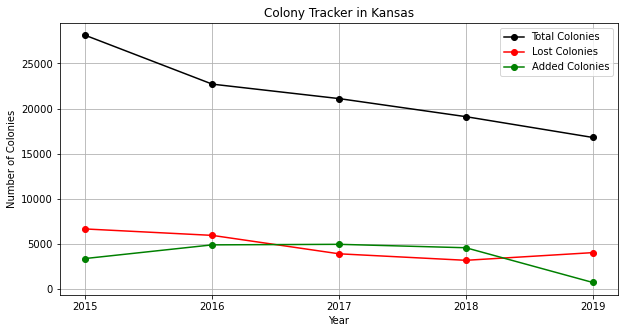

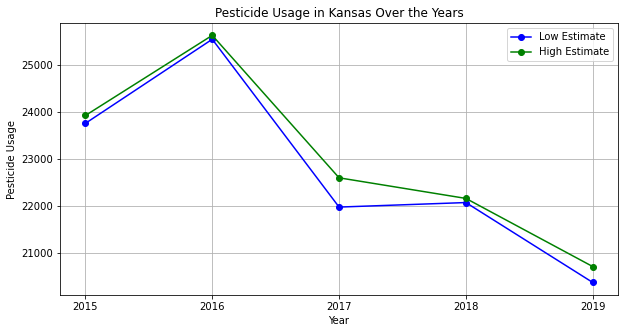

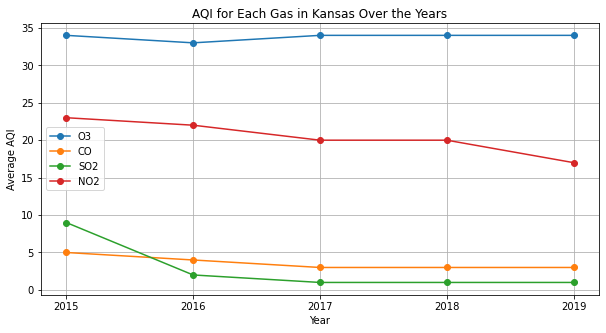

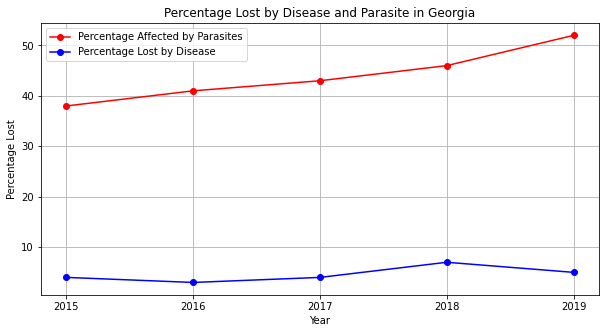

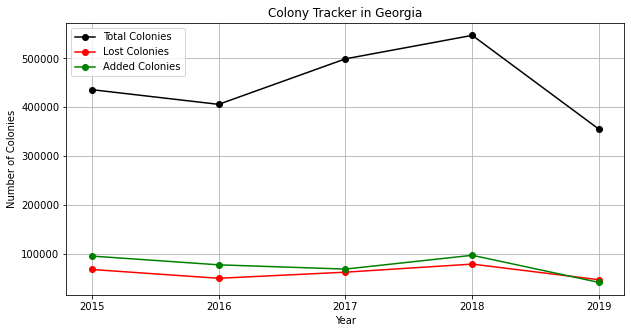

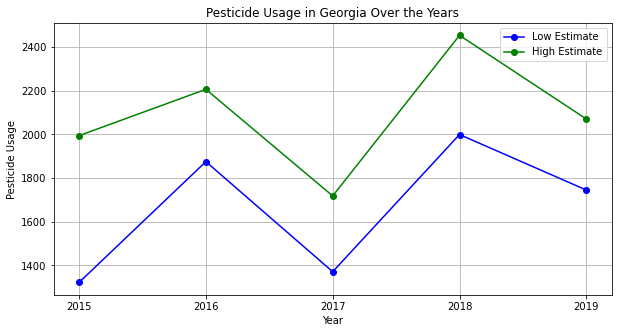

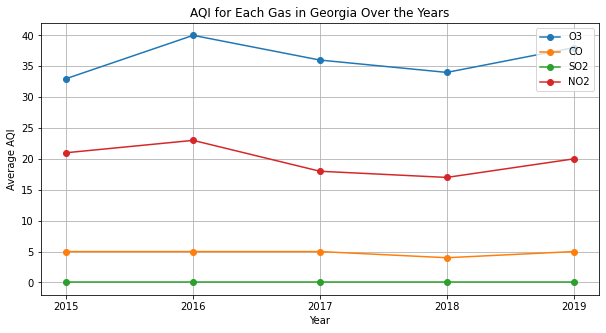

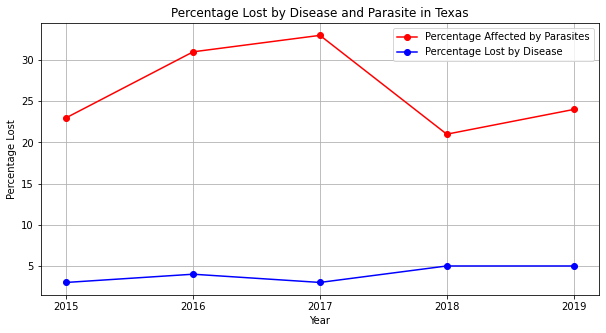

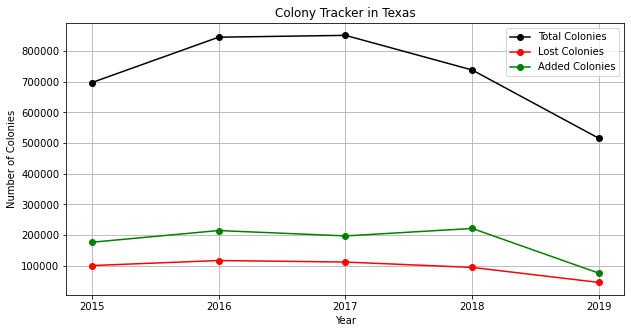

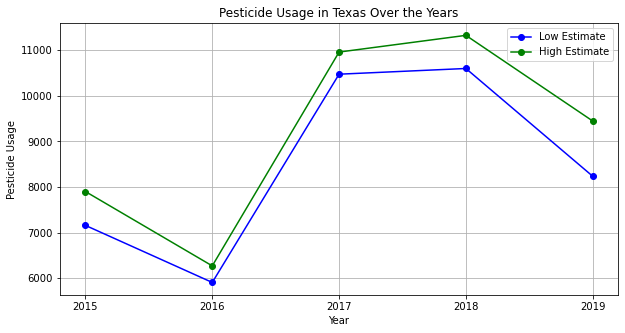

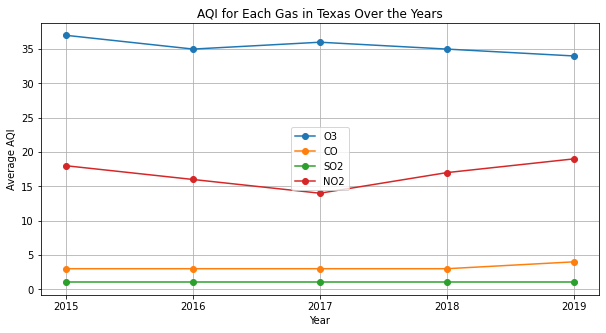

In [156]:
# Top 10 States with the Most Percentage Lost
states = ['Utah', 'Washington', 'Illinois', 'Massachusetts', 'Virginia', 'North Dakota', 'New Jersey', 'Kansas', 'Georgia', 'Texas']

for state in states:
    # Fetch data for percentage lost by disease
    def fetch_percentage_diseaselost_data():
        query = f"""
            SELECT Year, PercentLostByDisease
            FROM Bee
            WHERE State = '{state}'
            ORDER BY Year
        """
        cursor.execute(query)
        rows = cursor.fetchall()
        return rows

    # Fetch percentage affected by parasites data for the state from the Parasite table
    def fetch_parasite_data():
        query = f"""
            SELECT Year, PercentAffected
            FROM Parasite
            WHERE State = '{state}'
            ORDER BY Year
        """
        cursor.execute(query)
        rows = cursor.fetchall()
        return rows

    # Fetch colony tracker data
    def fetch_colony_tracker_data():
        query = f"""
            SELECT Year, Colony, LostColony, AddColony
            FROM Bee
            WHERE State = '{state}'
            ORDER BY Year
        """
        cursor.execute(query)
        rows = cursor.fetchall()
        return rows

    # Fetch pesticide usage data for the state
    def fetch_pesticide_usage_data():
        query = f"""
            SELECT Year, LowEstimate, HighEstimate
            FROM Pesticide
            WHERE State = '{state}'
            ORDER BY Year
        """
        cursor.execute(query)
        rows = cursor.fetchall()
        return rows

    # Fetch AQI data for each gas in the state
    def fetch_aqi_data():
        query = f"""
            SELECT Year, Name, AverageAQI
            FROM GasConditions
            WHERE State = '{state}'
            ORDER BY Year
        """
        cursor.execute(query)
        rows = cursor.fetchall()
        return rows

    # Fetch data for percentage lost by disease
    percentage_diseaselost_data = fetch_percentage_diseaselost_data()
    years_lost = [row[0] for row in percentage_diseaselost_data]
    percentage_lost_by_disease = [row[1] for row in percentage_diseaselost_data]

    # Fetch data for percentage affected by parasites
    parasite_data = fetch_parasite_data()
    years_parasite = [row[0] for row in parasite_data]
    percentage_parasite = [row[1] for row in parasite_data]

    # Fetch data for colony tracker
    colony_tracker_data = fetch_colony_tracker_data()
    colony_years = [row[0] for row in colony_tracker_data]
    colony_values = [row[1] for row in colony_tracker_data]
    lost_colonies = [row[2] for row in colony_tracker_data]
    added_colonies = [row[3] for row in colony_tracker_data]

    # Fetch pesticide usage data
    pesticide_data = fetch_pesticide_usage_data()
    years = [row[0] for row in pesticide_data]
    low_estimate = [row[1] for row in pesticide_data]
    high_estimate = [row[2] for row in pesticide_data]

    # Fetch AQI data for each gas
    aqi_data = fetch_aqi_data()

    # Separate AQI data for each gas
    gas_names = set(row[1] for row in aqi_data)
    gas_data = {gas_name: ([], []) for gas_name in gas_names}

    for row in aqi_data:
        year, gas_name, aqi_value = row
        gas_data[gas_name][0].append(year)
        gas_data[gas_name][1].append(aqi_value)

    # Plot 1: Percentage lost by disease and parasite
    plt.figure(figsize=(10, 5))
    plt.plot(years_parasite, percentage_parasite, marker='o', linestyle='-', color='red', label='Percentage Affected by Parasites')
    plt.plot(years_lost, percentage_lost_by_disease, marker='o', linestyle='-', color='blue', label='Percentage Lost by Disease')
    plt.xlabel('Year')
    plt.ylabel('Percentage Lost')
    plt.title(f'Percentage Lost by Disease and Parasite in {state}')
    plt.legend()
    plt.xticks(np.arange(min(years), max(years) + 1, 1))
    plt.grid(True)
    plt.show()

    # Plot 2: Colony tracker
    plt.figure(figsize=(10, 5))
    plt.plot(colony_years, colony_values, marker='o', linestyle='-', color='black', label='Total Colonies')
    plt.plot(colony_years, lost_colonies, marker='o', linestyle='-', color='red', label='Lost Colonies')
    plt.plot(colony_years, added_colonies, marker='o', linestyle='-', color='green', label='Added Colonies')
    plt.xlabel('Year')
    plt.ylabel('Number of Colonies')
    plt.title(f'Colony Tracker in {state}')
    plt.legend()
    plt.xticks(np.arange(min(years), max(years) + 1, 1))
    plt.grid(True)
    plt.show()

    # Plot 3: Pesticide usage data
    plt.figure(figsize=(10, 5))
    plt.plot(years, low_estimate, marker='o', linestyle='-', color='blue', label='Low Estimate')
    plt.plot(years, high_estimate, marker='o', linestyle='-', color='green', label='High Estimate')
    plt.xlabel('Year')
    plt.ylabel('Pesticide Usage')
    plt.title(f'Pesticide Usage in {state} Over the Years')
    plt.legend()
    plt.xticks(np.arange(min(years), max(years) + 1, 1))
    plt.grid(True)
    plt.show()

    # Plot 4: AQI data for each gas
    plt.figure(figsize=(10, 5))
    for gas_name, (years, aqi_values) in gas_data.items():
        plt.plot(years, aqi_values, marker='o', linestyle='-', label=gas_name)

    plt.xlabel('Year')
    plt.ylabel('Average AQI')
    plt.title(f'AQI for Each Gas in {state} Over the Years')
    plt.legend()
    plt.xticks(np.arange(min(years), max(years) + 1, 1))
    plt.grid(True)
    plt.show()


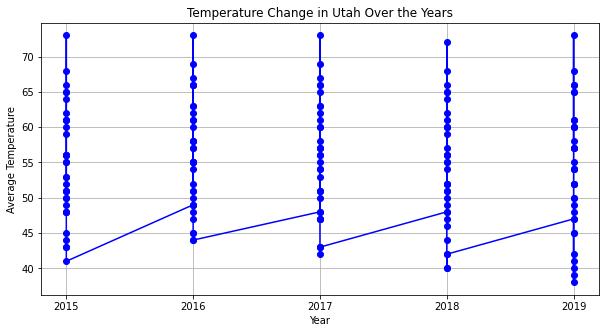

In [136]:
#!!! The Detect table is not correct

# # Function to fetch temperature data for Utah from MonitorStation table
# def fetch_temperature_data():
#     query = """
#         SELECT m.Year, m.AverageTemperature
#         FROM MonitorStation m
#         JOIN Detect d ON m.CentroidLongitude = d.CentroidLongitude 
#                      AND m.CentroidLatitude = d.CentroidLatitude
#                      AND m.Year = d.StationYear
#         WHERE d.BeeState = 'Utah'
#         ORDER BY m.Year
#     """
#     cursor.execute(query)
#     rows = cursor.fetchall()
#     return rows

# # Fetch temperature data for Utah from MonitorStation table
# temperature_data = fetch_temperature_data()
# years = [row[0] for row in temperature_data]
# temperatures = [row[1] for row in temperature_data]

# # Plot temperature change in Utah
# plt.figure(figsize=(10, 5))
# plt.plot(years, temperatures, marker='o', linestyle='-', color='blue')
# plt.xlabel('Year')
# plt.ylabel('Average Temperature')
# plt.title('Temperature Change in Utah Over the Years')
# # Set integer ticks for the x-axis
# plt.xticks(np.arange(min(years), max(years) + 1, 1));
# plt.grid(True)
# plt.show()

In [ ]:
# Close the cursor and connection
cursor.close()
connection.close()

## Major findings:


## Limitation: 
- for temperature, it will be better to look at the monthly data since the temperature may varies a lot during the year.
- Depending on the state, colony numbers may change depending on the quarter. Some states may have more seasonal trends whereas others may have less seasonal trends. It is possible that in some states, the heat might be too much in summer months. Also, Bee biology could just have natural cycles.
- Mite trends may have very cyclical in some wintering states.